## Predicting whether the email is spam or not


#### 1. Problem Definition
In a statement,
The problem we will be exploring is binary classification (a sample can only be one of two things).

This is because we have to build a system to identify spam emails(either the mail is spam or not).

#### 2. Data
All of the dataset values were provided by a company.

#### 3. Evaluation
Evaluating a models predictions using problem-specific evaluation metrics.
Following are the metrics we used to evaluate the performance of ML techniques:

1. Precision
Precision refers to the closeness of two or more measurements to each other. In Machine Learning, precision is the fraction of relevant instances among the retrieved instances. Precision = TP / (TP + FP) (Where TP = True Positive, TN = True Negative, FP = False Positive, FN = False Negative).

2. Accuracy
Accuracy refers to the closeness of a measured value to a standard or known value. Accuracy = (TP+TN) / ALL

3. Recall
Recall is how many of the true positives were recalled (found), i.e. how many of the correct hits were also found. Recall = TP / (TP + FN)

4. F1-Score
F1-scores are a statistical method for determining accuracy accounting for both precision and recall. It is essentially the harmonic mean of precision and recall.

5. AUC
AUC is the area under the ROC curve. The closer the AUC value is to 1, the better the model.

#### 4. Features
The following are the features we'll use to predict our target variable Is_Response.

Features:                    
1) subject :subject of the e-mail.                    
2) message :contains the body of the email .             

Label:       
1) label: 0 or 1.



In [1]:
# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score,cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve,roc_auc_score,auc
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')
#nltk
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords

from nltk.stem import WordNetLemmatizer, SnowballStemmer




## Data acquisition

In [2]:
# Reading the csv files
df_sms =pd.read_csv("./Downloads/NLP-Projects-to-do/NLP Projects to do/Project_2/Project_2/email_messages.csv/messages.csv",encoding='ISO-8859-1')
df_sms


,subject,message,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
1,NaN,"lang classification grimes , joseph e . and ba...",0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
3,risk,a colleague and i are researching the differin...,0
4,request book information,earlier this morning i was on the phone with a...,0
...,...,...,...
2888,love your profile - ysuolvpv,hello thanks for stopping by ! ! we have taken...,1
2889,you have been asked to join kiddin,"the list owner of : "" kiddin "" has invited you...",1
2890,anglicization of composers ' names,"judging from the return post , i must have sou...",0
2891,"re : 6 . 797 , comparative method : n - ary co...",gotcha ! there are two separate fallacies in t...,0


## Data Preprocessing 

In [3]:
# Display The head ==> To Check if Data is Properly Imported
df_sms.head()

,subject,message,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
1,NaN,"lang classification grimes , joseph e . and ba...",0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
3,risk,a colleague and i are researching the differin...,0
4,request book information,earlier this morning i was on the phone with a...,0


In [4]:
# chechking the features,duplicate values and nan values in the Datasets

print("\nFeatures/Columns : \n", df_sms.columns)
print("\n\nNumber of Features/Columns : ", len(df_sms.columns))
print("\nNumber of Rows : ",len(df_sms))
print("\n\nData Types :\n", df_sms.dtypes)
print("sum of duplicated values{}\n".format(df_sms.duplicated().sum()))
print("\nContains NaN/Empty cells : ", df_sms.isnull().values.any())
print("\nTotal empty cells by column :\n", df_sms.isnull().sum(),"\n\n")


Features/Columns : 
 Index(['subject', 'message', 'label'], dtype='object')


Number of Features/Columns :  3

Number of Rows :  2893


Data Types :
 subject    object
message    object
label       int64
dtype: object
sum of duplicated values17


Contains NaN/Empty cells :  True

Total empty cells by column :
 subject    62
message     0
label       0
dtype: int64 




In [5]:
#Replacing NaN values in subject field with mode text
df_sms['subject'].fillna(df_sms['subject'].mode()[0], inplace=True)
df_sms.head()

,subject,message,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
1,sociolinguistics,"lang classification grimes , joseph e . and ba...",0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
3,risk,a colleague and i are researching the differin...,0
4,request book information,earlier this morning i was on the phone with a...,0


In [6]:
#Creating a new column message_new which contains combine text of  both subject and message 
df_sms['message_new'] = df_sms[['subject', 'message']].apply(lambda x: ' '.join(x), axis = 1)
df_sms.head()

,subject,message,label,message_new
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0,job posting - apple-iss research center conten...
1,sociolinguistics,"lang classification grimes , joseph e . and ba...",0,"sociolinguistics lang classification grimes , ..."
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0,query : letter frequencies for text identifica...
3,risk,a colleague and i are researching the differin...,0,risk a colleague and i are researching the dif...
4,request book information,earlier this morning i was on the phone with a...,0,request book information earlier this morning ...


* subject field contains important information so combining it with messaget field and assign to message_new field

In [7]:
# Deleting subject,message Column
df_sms.drop(columns=['subject','message'],axis=1,inplace=True)

In [8]:
# Display the head
df_sms.head()

,label,message_new
0,0,job posting - apple-iss research center conten...
1,0,"sociolinguistics lang classification grimes , ..."
2,0,query : letter frequencies for text identifica...
3,0,risk a colleague and i are researching the dif...
4,0,request book information earlier this morning ...


In [9]:
print ('ham and spam counts','\n',df_sms.label.value_counts())

ham and spam counts 
 0    2412
1     481
Name: label, dtype: int64


In [10]:
#Ratio
print ('ham ratio = ', round(len(df_sms[df_sms['label']== 0]) / len(df_sms.label),2)*100,'%')
print ('spam ratio  = ', round(len(df_sms[df_sms['label']==1]) / len(df_sms.label),2)*100,'%')

ham ratio =  83.0 %
spam ratio  =  17.0 %


Text(0.5, 6.79999999999999, '0 = Ham , 1 = Spam')

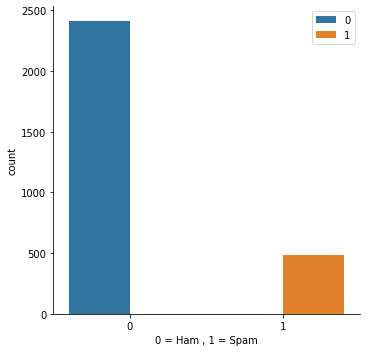

In [11]:
#Lets check the count of each class in target varaible
%matplotlib inline
sns.catplot(x='label',data=df_sms,kind='count',hue='label')
plt.legend()
plt.xlabel("0 = Ham , 1 = Spam")

* Here we see data is unbalanced but all the classes have significant number of instances

In [12]:
# Lets describe 
df_sms.groupby('label').describe()


message_new                                                            \
            count unique                                                top   
label                                                                         
0            2412   2408  ld ' 98 - call for participation ld ' 98 the f...   
1             481    468  re : = 20 the virtual girlfriend and virtual b...   

            
      freq  
label       
0        2  
1        4

In [14]:
# New column for Length of message
df_sms['length'] = df_sms.message_new.str.len()
df_sms.head()

,label,message_new,length
0,0,job posting - apple-iss research center conten...,2896
1,0,"sociolinguistics lang classification grimes , ...",1817
2,0,query : letter frequencies for text identifica...,1486
3,0,risk a colleague and i are researching the dif...,329
4,0,request book information earlier this morning ...,1071


In [15]:
# Replace email addresses with 'email'
df_sms['message_new'] = df_sms['message_new'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                 'emailaddress')

# Replace URLs with 'webaddress'
df_sms['message_new'] = df_sms['message_new'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'webaddress')

# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
df_sms['message_new'] = df_sms['message_new'].str.replace(r'£|\$', 'dollers')
    
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
df_sms['message_new'] = df_sms['message_new'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                  'phonenumber')

    
# Replace numbers with 'numbr'
df_sms['message_new'] = df_sms['message_new'].str.replace(r'\d+(\.\d+)?', 'numbr')

In [16]:
from nltk.corpus import wordnet
import string
from nltk import pos_tag
from nltk.corpus import stopwords

# Return the wordnet object value corresponding to the POS tag
#Part-Of-Speech (POS) tagging: assign a tag to every word to define if it corresponds to a noun, a verb etc. using the WordNet lexical database

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN


def clean_text(text):
    # lower text
    text = text.lower()
    text = re.sub("[^\w\s]", " ", text) 
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # Remove leading and trailing whitespace
    #text=re.sub("[^\s+|\s+?$]"," ",text)
    # remove stop words
    stop = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    #text=stemmer.stem(text)
    # remove words with only two letter
    text = [t for t in text if len(t) > 2]
    # join all
    text = " ".join(text)
    return(text)

# clean text data
df_sms["message_clean"] = df_sms["message_new"].apply(lambda x: clean_text(x))

### To clean textual data, call  custom 'clean_text' function that performs several transformations:

* lower the text
* tokenize the text (split the text into words) and remove the punctuation
* remove useless words that contain numbers
* remove useless stop words like 'the', 'a' ,'this','is' etc.
* Part-Of-Speech (POS) tagging: assign a tag to every word to define if it corresponds to a noun, a verb etc. using the WordNet   lexical database
* lemmatize the text: transform every word into their root form (e.g. rooms -> room, slept -> sleep)

In [17]:
# Add number of characters column
df_sms["clean_length"] = df_sms["message_clean"].apply(lambda x: len(x))

# Add number of words column
df_sms["clean_words"] = df_sms["message_clean"].apply(lambda x: len(x.split(" ")))

df_sms.head()

,label,message_new,length,message_clean,clean_length,clean_words
0,0,job posting - apple-iss research center conten...,2896,job post apple iss research center content len...,1993,248
1,0,"sociolinguistics lang classification grimes , ...",1817,sociolinguistics lang classification grime jos...,1389,180
2,0,query : letter frequencies for text identifica...,1486,query letter frequency text identification pos...,1056,150
3,0,risk a colleague and i are researching the dif...,329,risk colleague research differ degree risk per...,196,29
4,0,request book information earlier this morning ...,1071,request book information earlier morning phone...,604,84


In [18]:
 # Total length removal
print ('Origian Length', df_sms.length.sum())
print ('Clean Length', df_sms.clean_length.sum())

Origian Length 9440291
Clean Length 6361786


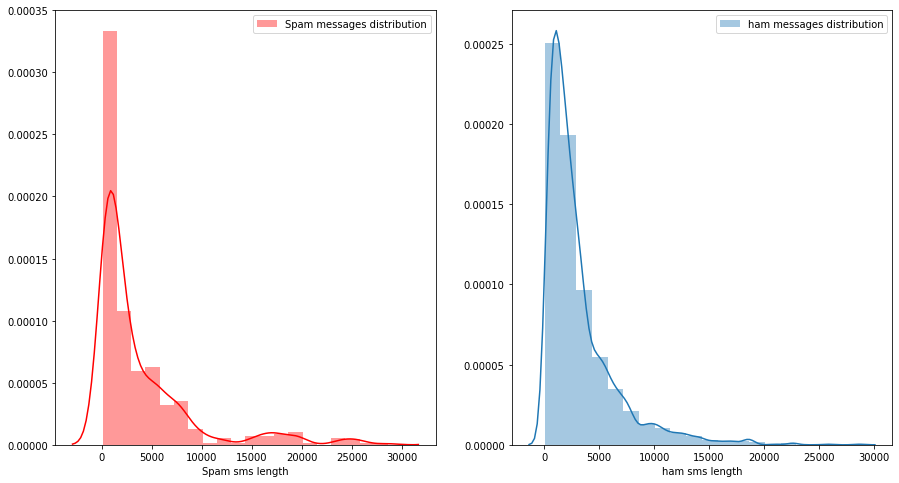

In [19]:
# Message distribution BEFORE cleaning
f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(df_sms[df_sms['label']==1]['length'],bins=20,ax=ax[0],label='Spam messages distribution',color='r')

ax[0].set_xlabel('Spam sms length')
ax[0].legend()

sns.distplot(df_sms[df_sms['label']==0]['length'],bins=20,ax=ax[1],label='ham messages distribution')
ax[1].set_xlabel('ham sms length')
ax[1].legend()

plt.show()

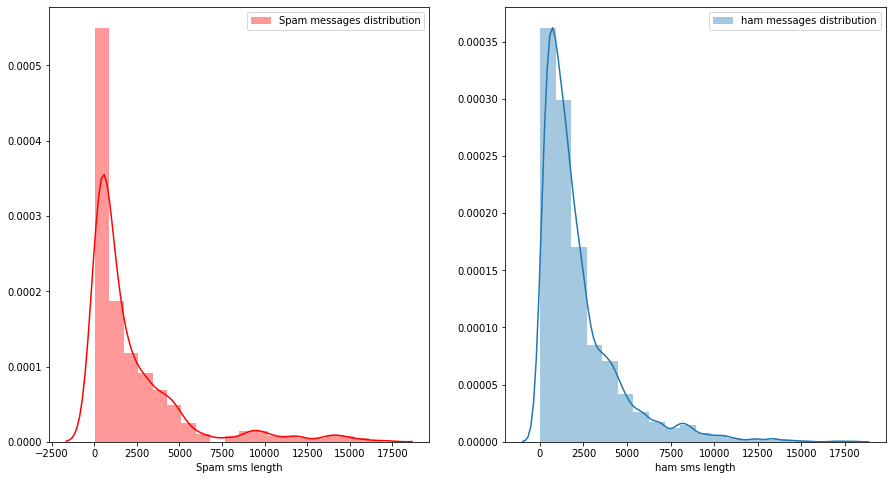

In [20]:
# Message distribution AFTER cleaning
f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(df_sms[df_sms['label']==1]['clean_length'],bins=20,ax=ax[0],label='Spam messages distribution',color='r')
ax[0].set_xlabel('Spam sms length')
ax[0].legend()

sns.distplot(df_sms[df_sms['label']==0]['clean_length'],bins=20,ax=ax[1],label='ham messages distribution')
ax[1].set_xlabel('ham sms length')
ax[1].legend()

plt.show()

* After clean the  text,it almost looks  normal distributed.

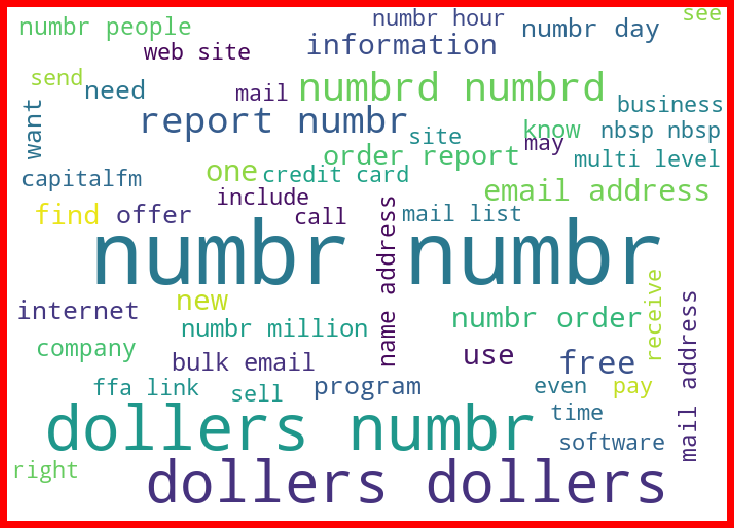

In [22]:
#Getting sense of loud words in spam 
from wordcloud import WordCloud


spams = df_sms['message_clean'][df_sms['label']==1]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=50).generate(' '.join(spams))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

* Most of the words are indeed related to the spam are: dollers,free,offer,business,money etc

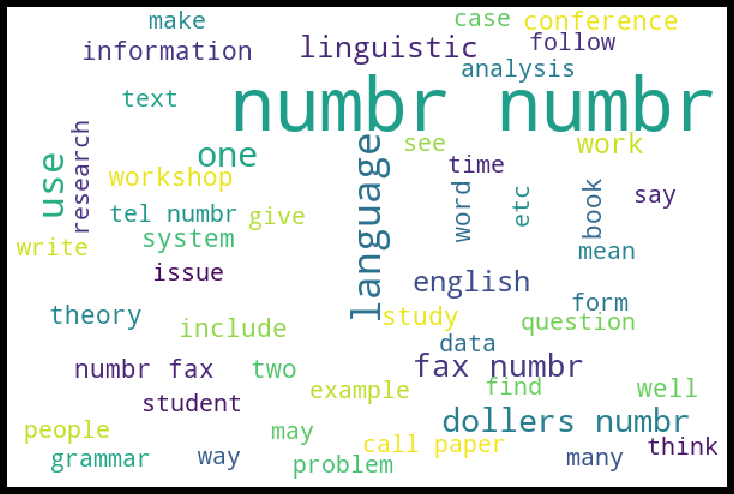

In [23]:
#Getting sense of loud words in ham 

hams = df_sms['message_clean'][df_sms['label']==0]
spam_cloud = WordCloud(width=600,height=400,background_color='white',max_words=50).generate(' '.join(hams))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

* Most of the words are indeed related to the ham are: language,linguistic,fax etc

## Building word dictionary

In [24]:
from collections import Counter
#lets count most frequent words in spam
count_spam = Counter(" ".join(df_sms[df_sms['label']==1]["message_clean"]).split()).most_common(20)
df_count_spam = pd.DataFrame.from_dict(count_spam)
df_count_spam = df_count_spam.rename(columns={0: "words of spam", 1 : "count"})
df_count_spam

,words of spam,count
0,numbr,15347
1,dollers,4460
2,mail,1728
3,order,1631
4,report,1403
5,address,1366
6,make,1196
7,email,1160
8,program,1084
9,get,1053


In [25]:
#lets count most frequent words in ham

count_ham = Counter(" ".join(df_sms[df_sms['label']==0]["message_clean"]).split()).most_common(20)
df_count_ham = pd.DataFrame.from_dict(count_ham)
df_count_ham = df_count_ham.rename(columns={0: "words of ham", 1 : "count"})
df_count_ham

,words of ham,count
0,numbr,60292
1,language,8104
2,university,6370
3,paper,3894
4,linguistics,3371
5,conference,2842
6,information,2610
7,one,2350
8,english,2304
9,use,2232


Text(0, 0.5, 'Count')

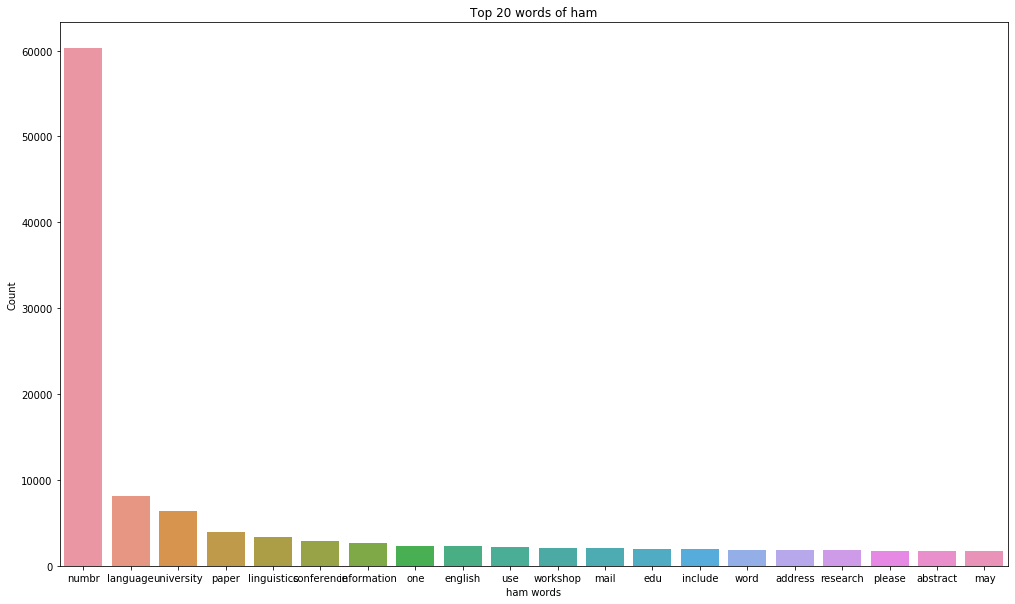

In [26]:
# Lets plot most common 20 words of ham
plt.figure(figsize=(17,10))
sns.barplot(x='words of ham',y="count",data=df_count_ham)
plt.title('Top 20 words of ham')
plt.xlabel('ham words')
plt.ylabel('Count')


Text(0, 0.5, 'Count')

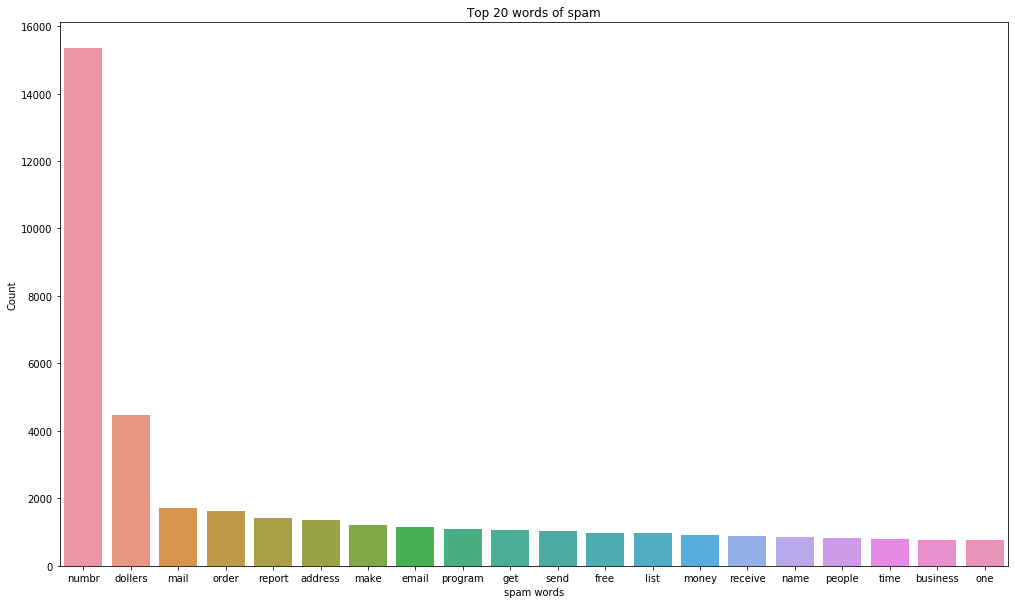

In [27]:
# Lets plot most common 20 words of spam
plt.figure(figsize=(17,10))
sns.barplot(x='words of spam',y="count",data=df_count_spam)
plt.title('Top 20 words of spam')
plt.xlabel('spam words')
plt.ylabel('Count')


## Feature extraction

In [28]:
#Function to apply the count vectorizer(BOW)
from sklearn.feature_extraction.text import CountVectorizer 

def features_transform_cv(mail):
    #get the bag of words for the mail text
    cv = CountVectorizer()
    features = cv.fit_transform(mail)
    #print sparsity value
    print('sparse matrix shape:', features.shape)
    print('number of non-zeros:', features.nnz) 
    print('sparsity: %.2f%%' % (100.0 * features.nnz / (features.shape[0] * features.shape[1])))
    return features

In [29]:
x=features_transform_cv(df_sms['message_clean'])
y = df_sms['label']

sparse matrix shape: (2893, 50241)
number of non-zeros: 471147
sparsity: 0.32%


## Training classifiers

In [31]:
#        Function which will find best Random State and then calculate Maximum Accuracy Score corresponding to it
#                                  and print accuracy score in one go.
def max_acc_score(regr,x,y):
    max_acc_score=0
    final_r_state=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=r_state,stratify=y)
        x_train, y_train = SMOTE().fit_sample(x_train, y_train)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        acc_score=accuracy_score(y_test,y_pred)
        if acc_score > max_acc_score:
            max_acc_score=acc_score
            final_r_state=r_state
    print('Max Accuracy Score corresponding to Random State ', final_r_state, 'is:', max_acc_score)
    print('\n')
    return final_r_state

*************************** Random Forest *****************************


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


Max Accuracy Score corresponding to Random State  93 is: 0.9930915371329879


Learning Score :  1.0
Accuracy Score :  0.9930915371329879
Cross Val Score :  0.9218309321332626
roc auc score :  0.991686076604555


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       483
           1       0.97      0.9

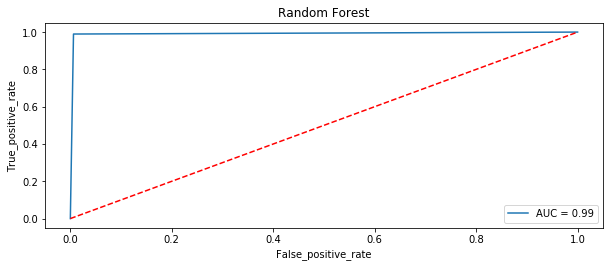

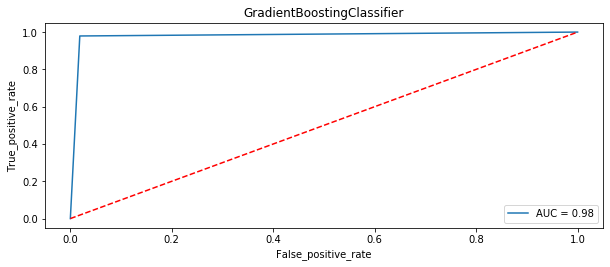

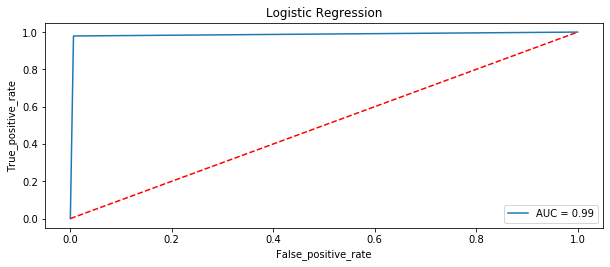

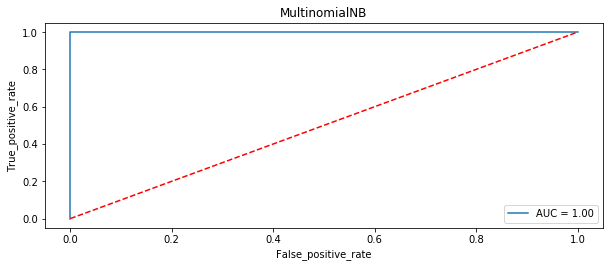

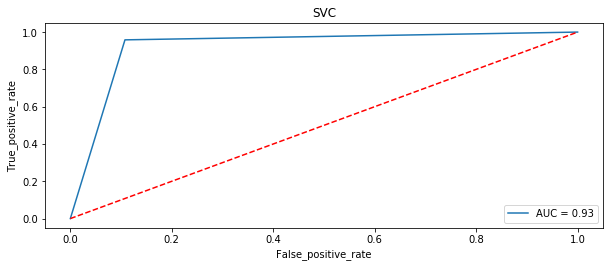

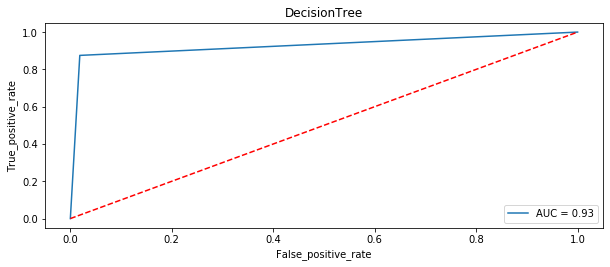

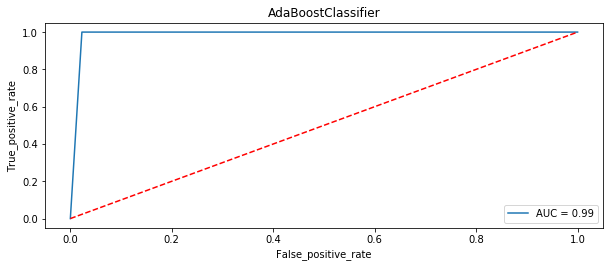

In [32]:
#Lists to store model name, Accuracy score, cross_val_score, Auc Roc score 
models =[]
models.append(("Random Forest",RandomForestClassifier()))
models.append(("GradientBoostingClassifier",GradientBoostingClassifier()))    
models.append(("Logistic Regression",LogisticRegression()))
models.append(('MultinomialNB',MultinomialNB()))
models.append(("SVC",SVC()))
models.append(("DecisionTree",DecisionTreeClassifier()))
models.append(('AdaBoostClassifier',AdaBoostClassifier()))


#     Lists to store model name, Learning score, Accuracy score, cross_val_score, Auc Roc score .
Model=[]
Score=[]
Acc_score=[]
cvs=[]
rocscore=[]
#            For Loop to Calculate Accuracy Score, Cross Val Score, Classification Report, Confusion Matrix

for name,model in models:
    print('***************************',name,'*****************************')
    print('\n')
    Model.append(name)
    print(model)
    print('\n')
    
     #        Now here I am calling a function which will calculate the max accuracy score for each model 
     #                               and return best random state.
    r_state=max_acc_score(model,x,y)
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=r_state,stratify=y)
    x_train, y_train = SMOTE().fit_sample(x_train, y_train)
    model.fit(x_train,y_train)
#..............Learning Score...........
    score=model.score(x_train,y_train)
    print('Learning Score : ',score)
    Score.append(score*100)
    y_pred=model.predict(x_test)
    acc_score=accuracy_score(y_test,y_pred)
    print('Accuracy Score : ',acc_score)
    Acc_score.append(acc_score*100)
#................Finding Cross_val_score..................    
    cv_score=cross_val_score(model,x,y,cv=10,scoring='f1').mean()
    print('Cross Val Score : ', cv_score)
    cvs.append(cv_score*100)
    
#................Roc auc score...........................    
    false_positive_rate,true_positive_rate, thresholds=roc_curve(y_test,y_pred)
    roc_auc=auc(false_positive_rate, true_positive_rate)
    print('roc auc score : ', roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('Classification Report:\n',classification_report(y_test,y_pred))
    print('\n')
    print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True_positive_rate')
    plt.xlabel('False_positive_rate')
    print('\n\n')

In [33]:
# Making a Dataframe comprises of Differnt Calculated Scores :
result=pd.DataFrame({'Model': Model,'Learning Score': Score,'Accuracy Score': Acc_score,'Cross Val Score':cvs,
                     'Roc_Auc_curve':rocscore}) 
result.style.background_gradient(cmap='YlGnBu')

,Model,Learning Score,Accuracy Score,Cross Val Score,Roc_Auc_curve
0,Random Forest,100,99.3092,92.1831,99.1686
1,GradientBoostingClassifier,98.3929,98.1002,90.6691,98.0267
2,Logistic Regression,100,99.1364,96.8349,98.6478
3,MultinomialNB,99.015,100,95.8376,100
4,SVC,92.9756,90.3282,71.983,92.5336
5,DecisionTree,100,96.3731,87.366,92.8183
6,AdaBoostClassifier,99.4557,98.1002,95.5991,98.8613


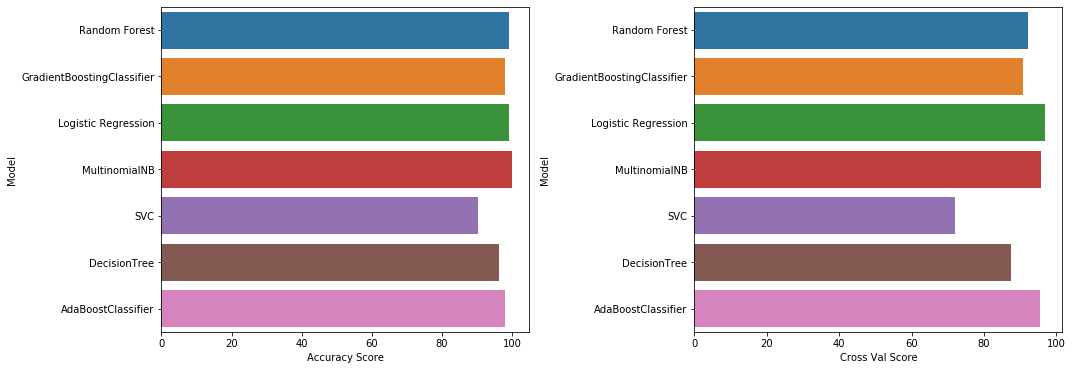

In [34]:
#Plotting bar plot of accuracy scores and crossval scores of various models
plt.figure(figsize=(15,15))

plt.subplot(3,2,1)
sns.barplot(x = 'Accuracy Score', y = 'Model', data = result)

plt.subplot(3,2,2)
sns.barplot(x = 'Cross Val Score', y = 'Model', data = result)
plt.tight_layout()
plt.show()


In [35]:
#Define a function to calculate accuracy,precision,recall and f1 score
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2), 
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")

    return metric_dict

## From above results we can conclude that MultinomialNB performing well as compared to other models.

In [36]:
#lets make our MultinomialNB as final model
x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = 47,test_size=0.20,stratify=y)
x_train, y_train = SMOTE().fit_sample(x_train, y_train)
mnb = MultinomialNB()
mnb.fit(x_train,y_train)
predmnb=mnb.predict(x_test)
evaluate_preds(y_test,predmnb)

Acc: 100.00%
Precision: 1.00
Recall: 1.00
F1 score: 1.00


{'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0, 'f1': 1.0}

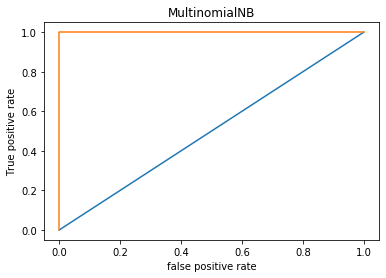

roc_auc_score =  1.0


In [37]:
# Make predictions with probabilities
y_probs = mnb.predict_proba(x_test)

# Keep the probabilites of the positive class only
y_probs = y_probs[:, 1]

# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Check the false positive rate
fpr
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr,label='MultinomialNB')
plt.xlabel('false positive rate')
plt.ylabel('True positive rate')
plt.title('MultinomialNB')
plt.show()
print('roc_auc_score = ',roc_auc_score(y_test, y_probs))

[[483   0]
 [  0  96]]


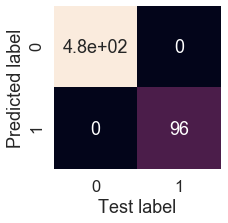

In [38]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, predmnb):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, predmnb),
                     annot=True,
                     cbar=False)
    plt.xlabel("Test label")
    plt.ylabel("Predicted label")
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_conf_mat(y_test, predmnb)
#lets printed confusion_matrix
print(confusion_matrix(y_test, predmnb))

## Testing 

In [39]:
# Printing predicted values 
test=pd.DataFrame(data=y_test,)
test['Predicted values']=predmnb
test
# On the lest side values are those fields which are taken by machine for test...

,label,Predicted values
1903,0,0
1455,0,0
1544,0,0
836,0,0
526,0,0
...,...,...
316,0,0
1344,0,0
2049,1,1
1043,0,0


In [40]:
# Saving the Predicted values in csv file
df1=pd.DataFrame(predmnb)
df1.to_csv('Project_2_spam_mails_submission.csv')

In [41]:
#lets save the model using joblib
from sklearn.externals import joblib
joblib.dump(mnb,'Project_2_spam_mails.pkl')

['Project_2_spam_mails.pkl']

In [42]:
#read the file using joblib
mnb_from_joblib=joblib.load('Project_2_spam_mails.pkl')
joblib_y_preds = mnb_from_joblib.predict(x_test)
evaluate_preds(y_test, joblib_y_preds)

Acc: 100.00%
Precision: 1.00
Recall: 1.00
F1 score: 1.00


{'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0, 'f1': 1.0}

## Conclusion

1. * Some of the words like dollers,free,offer,business,money etc" are indication of spams
2. * MultinomialNB performing very well as compared to other models considering below results :
       >> * Precision: 1
       >> * Recall: 1
       >> * F1 score: 1
       >> * roc_auc_score : 1
       >> * accuracy : 100%